In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

In [5]:
# Datasetteki tüm resimler öncesinde recolor dosyası ile greyscale çevrildi
# resize ile tüm resimler 224x224 boyutlandırıldı
# dublican_deleter ile fazlalıklar henüz silinmedi... yapılabilir

img_size = 224
batch_size = 32

# CNN i başlat
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

epochs = 70  # epochları artır
initial_learning_rate = 0.001

opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# eğitim için Data augmentation and normalization 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# test için Normalization 
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim generator
train_generator = train_datagen.flow_from_directory(
    'datasett/dataset1/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  # Load images as grayscale
)

# Test generator
validation_generator = test_datagen.flow_from_directory(
    'datasett/dataset1/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  # Load images as grayscale
)


Found 16305 images belonging to 3 classes.
Found 4622 images belonging to 3 classes.


Epoch 1/70


C:\Users\burci\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


509/509 ━━━━━━━━━━━━━━━━━━━━ 963s 2s/step - accuracy: 0.4567 - loss: 1.0629 - val_accuracy: 0.5278 - val_loss: 1.0001
Epoch 2/70
  1/509 ━━━━━━━━━━━━━━━━━━━━ 13:40 2s/step - accuracy: 0.6875 - loss: 0.7762

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - accuracy: 0.6875 - loss: 0.7762 - val_accuracy: 0.2857 - val_loss: 1.0538
Epoch 3/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 814s 2s/step - accuracy: 0.5907 - loss: 0.8733 - val_accuracy: 0.6076 - val_loss: 0.8486
Epoch 4/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 333us/step - accuracy: 0.6875 - loss: 0.7263 - val_accuracy: 0.7143 - val_loss: 0.7630
Epoch 5/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.6592 - loss: 0.7587 - val_accuracy: 0.6335 - val_loss: 0.7874
Epoch 6/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - accuracy: 0.7500 - loss: 0.6305 - val_accuracy: 0.8571 - val_loss: 0.5451
Epoch 7/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 749s 1s/step - accuracy: 0.6913 - loss: 0.6975 - val_accuracy: 0.6710 - val_loss: 0.7345
Epoch 8/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 333us/step - accuracy: 0.7812 - loss: 0.5774 - val_accuracy: 0.7143 - val_loss: 0.6366
Epoch 9/70
509/509 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.7134 - loss: 0.6597 - val_accuracy: 0

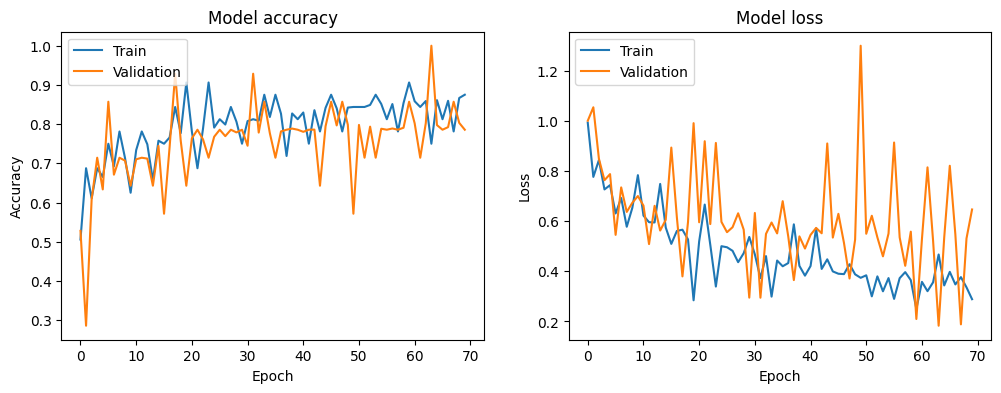

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Modeli eğit
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)



In [8]:
model.save('trained_emotion_model2.keras')


In [9]:
from tensorflow.keras.models import load_model

model = load_model('trained_emotion_model2.keras')

# model yapısını  JSON dosyası olarak kaydet
model_json = model.to_json()
with open('new_model/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# model ağırlıklarını HDF5 dosyası olarak kaydet
model.save_weights('new_model/model.weights.h5')

In [11]:
from tensorflow.keras.models import model_from_json

# model yapısını JSON dosyasından yükle
with open('new_model/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# yüklenmiş architecturedan modeli oluştur
loaded_model = model_from_json(loaded_model_json)

# model ağırlıklarını HDF5 dosyasından yükle
loaded_model.load_weights('new_model/model.weights.h5')

# yüklenen modeli compilella (tahmin yapmak veya sonrasında model eğitmek için gerekli)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Load your trained model
from tensorflow.keras.models import load_model

# Replace 'path_to_your_model.keras' with the path to your trained model file
model = load_model('modelll_weight.keras')

# Save the model architecture to a JSON file
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights('model_weights.h5')

ValueError: Layer "dense" expects 1 input(s), but it received 2 input tensors. Inputs received: [<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_655>, <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_656>]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json  # model architecture ve modelin weightini yüklemek için

#--------------- JSON ve H5 DEN MODEL OLUŞTURMA ---------------------------
# model architecture JSON dosyasından yükkle
with open('new_model/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# model weightini yükle
loaded_model.load_weights('new_model/model.weights.h5') #bu dosya train aşamasında yüklendikten bir süre sonra kayboluyor #Nedden??

#--------------- KERAS DAN MODEL OLUŞTURMA ---------------------------
# loaded_model = tf.keras.models.load_model('new_model/trained_emotion_model2.keras')

# Modeli TFLite formatına dönüştür
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# TFLite modelini kaydet
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
# Label adları
class_names = ['angry', 'happy', 'sad']

# Labelları kaydet
with open('labels.txt', 'w') as f:
    for class_name in class_names:
        f.write(f"{class_name}\n")
